In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=sns.load_dataset("iris")

In [4]:
from sklearn.datasets import load_iris

In [9]:
iris=load_iris()

In [10]:
x=df.iloc[:,:-1]
y=iris.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=70)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(x_train,y_train)
from sklearn import tree

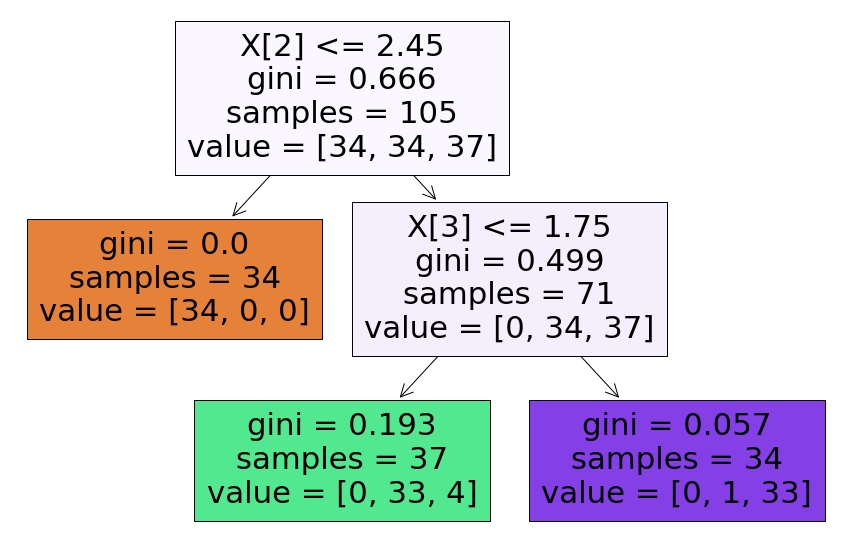

In [15]:
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)
plt.show()

In [16]:
y_pred=treemodel.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)

In [17]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      0.94      0.97        17\n           2       0.92      1.00      0.96        12\n\n    accuracy                           0.98        45\n   macro avg       0.97      0.98      0.98        45\nweighted avg       0.98      0.98      0.98        45\n'

In [19]:
##pre prunning
parameters={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    "max_features":["auto","sqrt","log2"]
    
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
treemodel2=DecisionTreeClassifier()

In [22]:
cv=GridSearchCV(treemodel,param_grid=parameters,cv=10,scoring="accuracy")

In [23]:
cv.fit(x_train,y_train)

C:\Users\mishr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mishr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mishr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\mishr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_faile

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [28]:
y_predict=cv.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report

In [30]:
score=accuracy_score(y_test,y_predict)

In [31]:
score

0.9333333333333333

In [32]:
classification=classification_report(y_test,y_predict)

In [33]:
classification

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       0.93      0.88      0.90        16\n           2       0.86      0.92      0.89        13\n\n    accuracy                           0.93        45\n   macro avg       0.93      0.93      0.93        45\nweighted avg       0.94      0.93      0.93        45\n'